In [3]:
import os
from glob import glob
import matplotlib.pyplot as plt
import matplotlib.image as img
%matplotlib inline

import keras_ocr

import pytesseract
from PIL import Image
from pytesseract import Output

## Step1. 검증용 데이터셋 준비

In [7]:
work_dir = os.getenv('HOME')+'/aiffel/ocr_python/images/'

images = glob(work_dir+'*')
images.sort()
images

['/aiffel/aiffel/ocr_python/images/008.png',
 '/aiffel/aiffel/ocr_python/images/20201015_5f889c6736569.jpg',
 '/aiffel/aiffel/ocr_python/images/8e157535ab75c1602074522df6acbf0b.jpg']

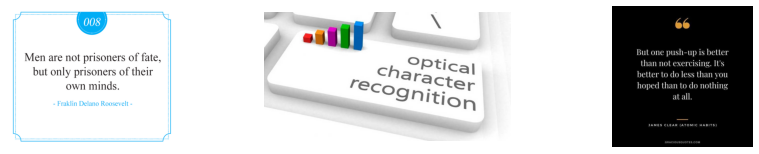

In [8]:
plt.figure(figsize=(15,15))

for idx, im in enumerate(images):
    plt.subplot(5, 3, idx+1)
    im = img.imread(im)
    plt.imshow(im)
    plt.axis('off')

## 선호하는 영화를 5가지 골라서 ratings에 추가

## 테스트

In [9]:
pipeline = keras_ocr.pipeline.Pipeline()

Looking for /aiffel/.keras-ocr/craft_mlt_25k.h5
Looking for /aiffel/.keras-ocr/crnn_kurapan.h5


In [10]:
images_keras = [ keras_ocr.tools.read(image) for image in images]
prediction_groups = [pipeline.recognize([image]) for image in images]

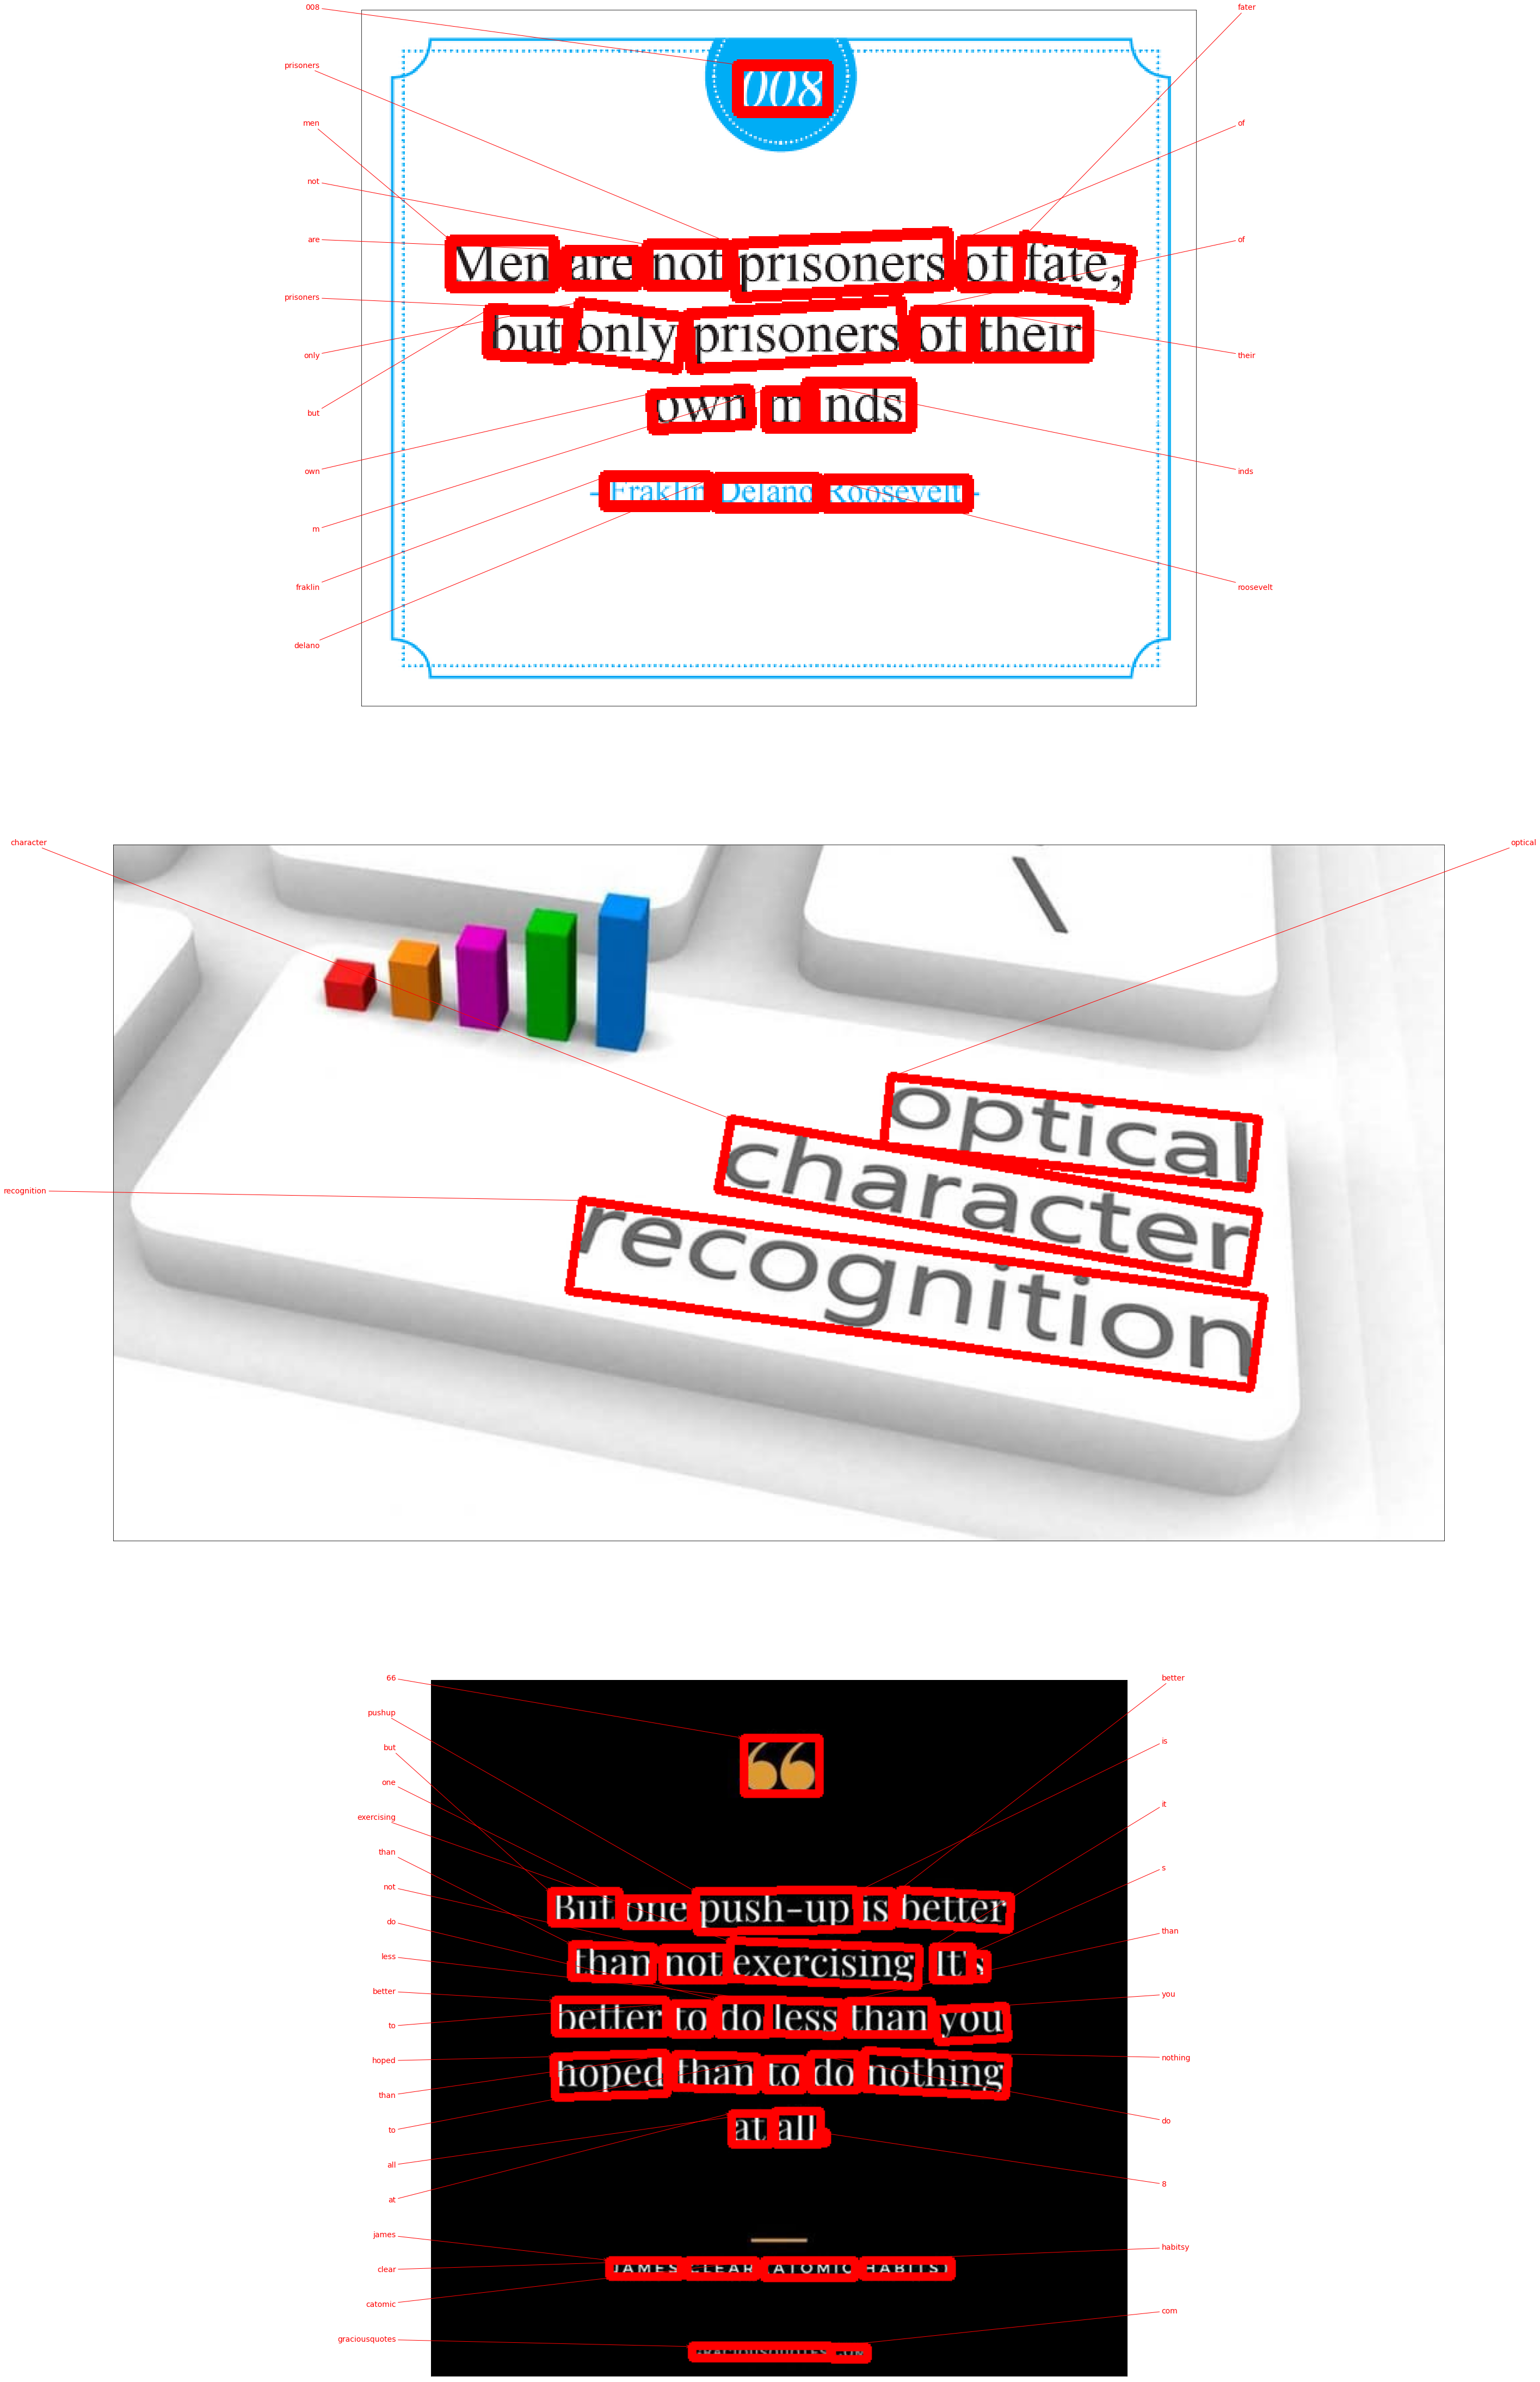

In [11]:
# Plot the predictions
fig, axs = plt.subplots(nrows=len(images), figsize=(80, 80))
for idx, ax in enumerate(axs):
    keras_ocr.tools.drawAnnotations(image=images_keras[idx], 
                                    predictions=prediction_groups[idx][0], ax=ax)